## Import Libraries

In [85]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix,\
 f1_score, recall_score, plot_roc_curve, precision_score, roc_auc_score

In [67]:
df = pd.read_csv("./youtube/aggregated.csv")
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.head()

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0


In [68]:
df.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,53854.000000,53854.000000,55292.0
mean,896.678073,100.573157,4.239311,0.106055,0.175577,2.365279,0.053389,0.347821,205.297156,0.0
std,927.380801,1704.966002,65.291451,2.507351,3.601171,65.889539,0.766945,0.259734,206.542106,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145948,85.442891,0.0
50%,545.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320983,170.139725,0.0
75%,934.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.486153,259.449958,0.0
max,5029.000000,285593.000000,9165.000000,399.000000,436.000000,9599.000000,103.000000,4.967797,5027.660000,0.0


In [69]:
# unique country codes

df['Country Code'].nunique() 

233

In [70]:
# subset df to see highest views by country

country_views = df[['Video Title','Country Code','Views','Is Subscribed']]
country_views.head()

,Video Title,Country Code,Views,Is Subscribed
0,🌶 Hot Topics in Tech: Data Science Explained #...,HK,23,True
1,🌶 Hot Topics in Tech: Data Science Explained #...,ME,3,True
2,🌶 Hot Topics in Tech: Data Science Explained #...,RW,2,True
3,🌶 Hot Topics in Tech: Data Science Explained #...,US,979,True
4,🌶 Hot Topics in Tech: Data Science Explained #...,DE,75,False


In [71]:
# sort values by views 

country_views.sort_values(by=['Views'])

,Video Title,Country Code,Views,Is Subscribed
16082,Should You Be Excited About Web 3? (As a Data ...,TZ,0,False
42327,Data Science in Golf: PGA Merchandise Show 2020,LK,0,False
5521,What is the Future of my Comment Leaderboard P...,NaN,0,False
11822,The Data Science Interview: What to Expect,PE,0,False
14476,Thank You For The Support | What's Next | Ken ...,EG,0,False
...,...,...,...,...
35783,How I Would Learn Data Science (If I Had to St...,CA,44835,False
35557,How I Would Learn Data Science (If I Had to St...,GB,49982,False
12331,The Best Free Data Science Courses Nobody is T...,IN,70240,False
35664,How I Would Learn Data Science (If I Had to St...,IN,203055,False


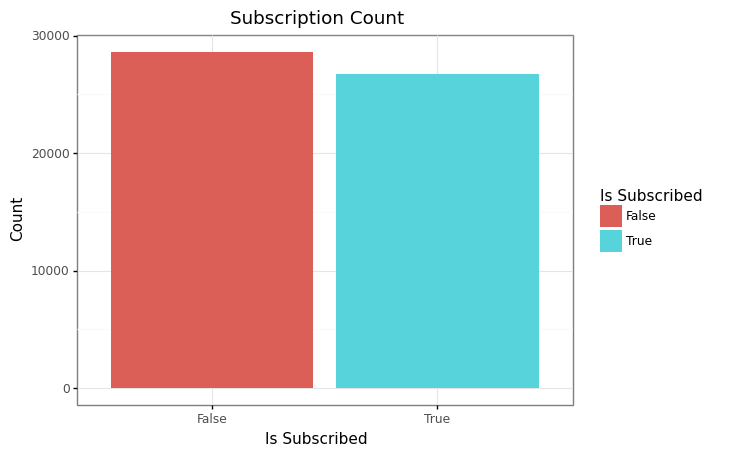

<ggplot: (8783927114518)>

In [72]:
ggplot(df, aes(x='Is Subscribed', fill='Is Subscribed')) + geom_bar() + theme_bw() + labs(x='Is Subscribed', y='Count', title='Subscription Count')

## Logistic Regression

In [77]:
# predictors
preds = ['Video Length','Views','Video Likes Added','Video Dislikes Added','Video Likes Removed','User Subscriptions Added','User Subscriptions Removed']
x = df[preds]
# outcome
y = df['Is Subscribed']


# train test split 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [78]:
# zcsore 

z = StandardScaler()
z.fit(X_train)

X_train[preds] = z.transform(X_train)
X_test[preds] = z.transform(X_test)

In [79]:
# create Logit obj 

myLogit = LogisticRegression(penalty = "none") 

In [80]:
#fit the training data

myLogit.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [81]:
#predict

predictedVals = myLogit.predict(X_test)
predictedProbs = myLogit.predict_proba(X_test)

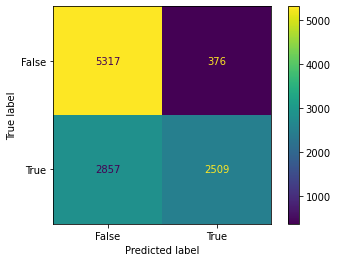

In [83]:
# confusion matrix

plot_confusion_matrix(myLogit,X_test, y_test)

In [ ]:
# true negative = an outcome where the model correctly predicts the negative class.
# true postive = an outcome where the model correctly predicts the positive class.

# false positive = an outcome where the model incorrectly predicts the positive class
# false negative = an outcome where the model incorrectly predicts the negative class.

In [86]:
# metrics for test set
print("Accuracy: ", accuracy_score(y_test, predictedVals))
print("F1 Score: ", f1_score(y_test, predictedVals))
print("Recall: ", recall_score(y_test, predictedVals))
print("Precision: ", precision_score(y_test, predictedVals))

Accuracy:  0.7076589203363776
F1 Score:  0.6081687068234154
Recall:  0.46757361162877376
Precision:  0.8696707105719237


In [87]:
# metrics training set
print("Accuracy: ", accuracy_score(y_train, myLogit.predict(X_train)))
print("F1 Score: ", f1_score(y_train, myLogit.predict(X_train)))
print("Recall: ", recall_score(y_train, myLogit.predict(X_train)))
print("Precision: ", precision_score(y_train, myLogit.predict(X_train)))

Accuracy:  0.7059887414373883
F1 Score:  0.6035906971073246
Recall:  0.4640078732777205
Precision:  0.8632836341442148


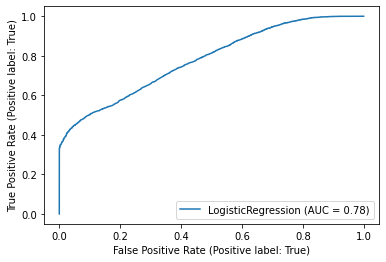

In [88]:
# ROC curve for test set 
plot_roc_curve(myLogit, X_test, y_test)

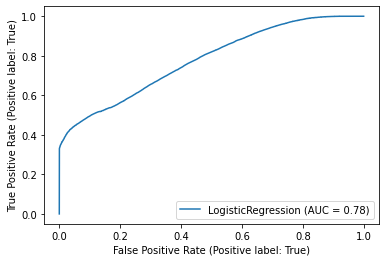

In [89]:
# ROC curve for train set
plot_roc_curve(myLogit, X_train, y_train)


## Coefs

In [91]:
coef = pd.DataFrame({"Coefs": myLogit.coef_[0],
                    "Names": preds})
coef = coef.append({"Coefs": myLogit.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)

In [92]:
coef["Odds Coef"] = np.exp(coef["Coefs"])
coef

,Coefs,Names,Odds Coef
0,0.067397,Video Length,1.069721e+00
1,-78.809142,Views,5.937788e-35
2,35.797753,Video Likes Added,3.521815e+15
3,-1.219197,Video Dislikes Added,2.954673e-01
4,-2.752875,Video Likes Removed,6.374433e-02
5,1212.509360,User Subscriptions Added,inf
6,669.137382,User Subscriptions Removed,4.005648e+290
7,84.256816,intercept,3.910840e+36


# Coef interpretation
- if Video Length increases by one unit, then the likelihood of a viewer being subscribed is more likely. 
- if Views increases by one unit, then the likelihood of a viewer being subscribed is less likely. 

Coeffs that effect the likelihood of a subscriber:
- Video Length
- Video Likes Added
- User Subscriptions Removed